In [1]:
import sys
sys.path.insert(0, '..')
import nibabel
import numpy as np
import matplotlib.pyplot as plt
import os
import lib.utils.stan
import lib.io.tvb
import matplotlib.cm
import json

In [2]:
root_dir = "../datasets/retro/id020_lma"

t1 = nibabel.load(os.path.join(root_dir, "mri", "T1.mgz"))
t1_dat = t1.get_data()
# lbl = nibabel.load(os.path.join(root_dir, "dwi", "label_in_T1.destrieux.nii.gz"))
# lbl_dat = lbl.get_data()
lbl_dat_t1fov = np.load(os.path.join(root_dir, "dwi", "label_in_T1fov.destrieux.npy"))

/home/anirudh/anaconda3/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.


In [6]:
with open('../datasets/retro/ez_hyp_destrieux.json') as fd:
    ez_hyp_all = json.load(fd)
    ez_hyp = ez_hyp_all['id020_lma']['i_ez']

print("Hypothesis")
print(f"EZ: {ez_hyp}\n")

eta_est = np.load('../results/meysam/eta_est_id020_lma.npy')
ez = np.nonzero(eta_est > -2.0)[0]
pz = np.nonzero(np.logical_and(eta_est > -2.5, eta_est < -2.0))[0]
print("Prediction")
print(f"EZ: {ez} \nPZ: {pz}")
szng_roi = np.concatenate((ez, pz))

Hypothesis
EZ: [111, 87, 86, 82, 138]

Prediction
EZ: [82 86 87] 
PZ: [111 138]


# Hypothesis

In [14]:
szng_col_idxs = []
for i,roi in enumerate(ez_hyp):
    szng_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi + 1)[0]))
    print(roi, szng_col_idxs[i])

111 [ 97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120]
87 [ 97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117]
86 [ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119]
82 [106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127]
138 [ 88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


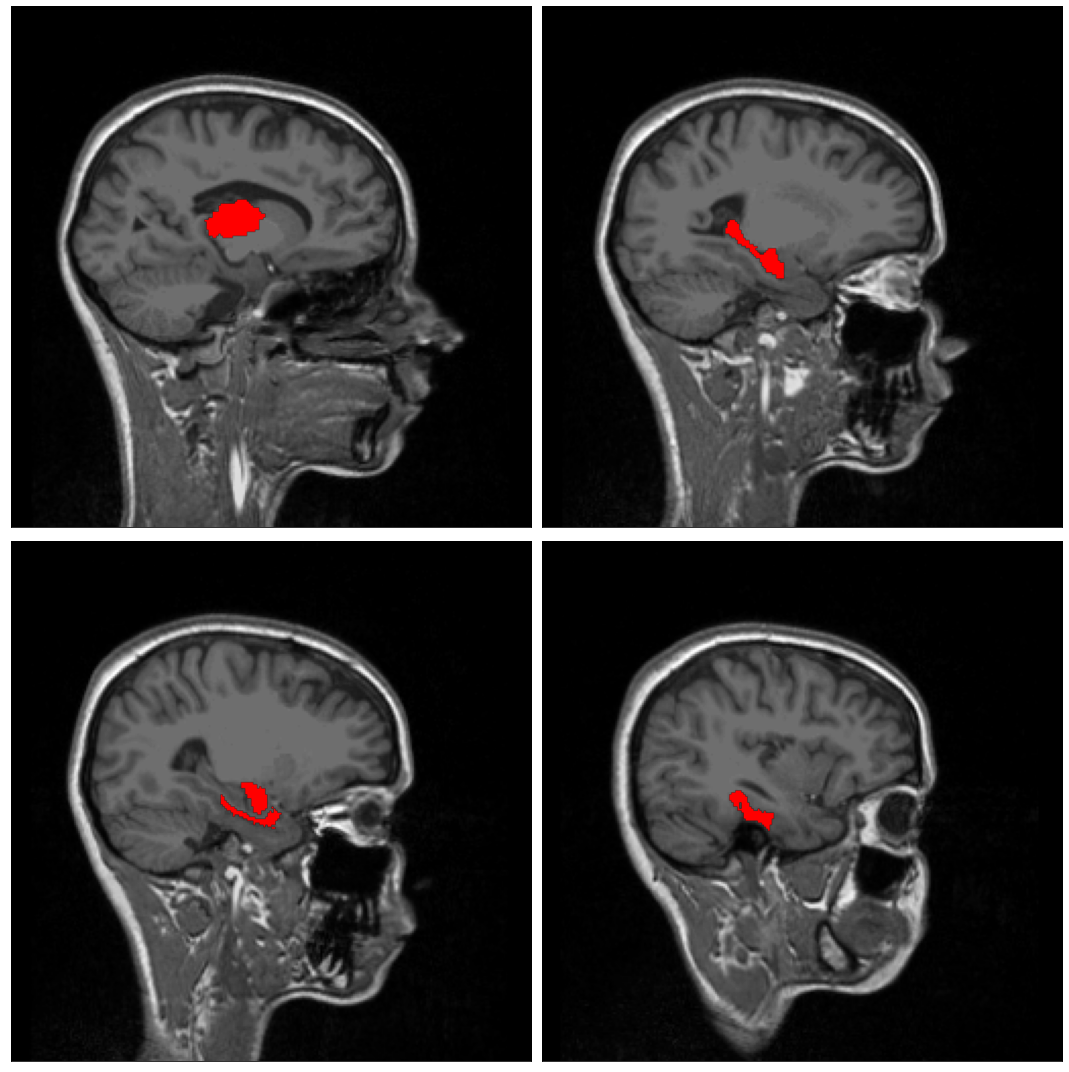

In [16]:
slc_idx = [115, 108, 105, 96]
slc_roi = {slc_idx[0]:(82,), slc_idx[1]:(86,), slc_idx[2]:(87, 111,), slc_idx[3]:(138,)}
ez_clr = (255,0,0,1)
pz_clr = (255,255,0,1)
hz_clr = (0,255,0,1)
plt.figure(figsize=(15,15))
for i, slc_idx_ in enumerate(slc_idx):
    t1_slc = t1_dat[slc_idx_, :, :]
    lbl_slc = lbl_dat_t1fov[slc_idx_, :, :]
    ol = np.zeros(lbl_slc.shape + (4,))
    for roi in slc_roi[slc_idx_]:
        if roi in ez_hyp:
            ol[lbl_slc == roi+1] = ez_clr
    plt.subplot(2,2,i+1)
    plt.imshow(t1_slc, cmap='gray');
    plt.imshow(ol)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.savefig('../results/meysam/slice_plots_hypothesis.svg')

# Prediction

In [17]:
szng_col_idxs = []
for i,roi in enumerate(szng_roi):
    szng_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi + 1)[0]))
    print(roi, szng_col_idxs[i])

82 [106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127]
86 [ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119]
87 [ 97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117]
111 [ 97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120]
138 [ 88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


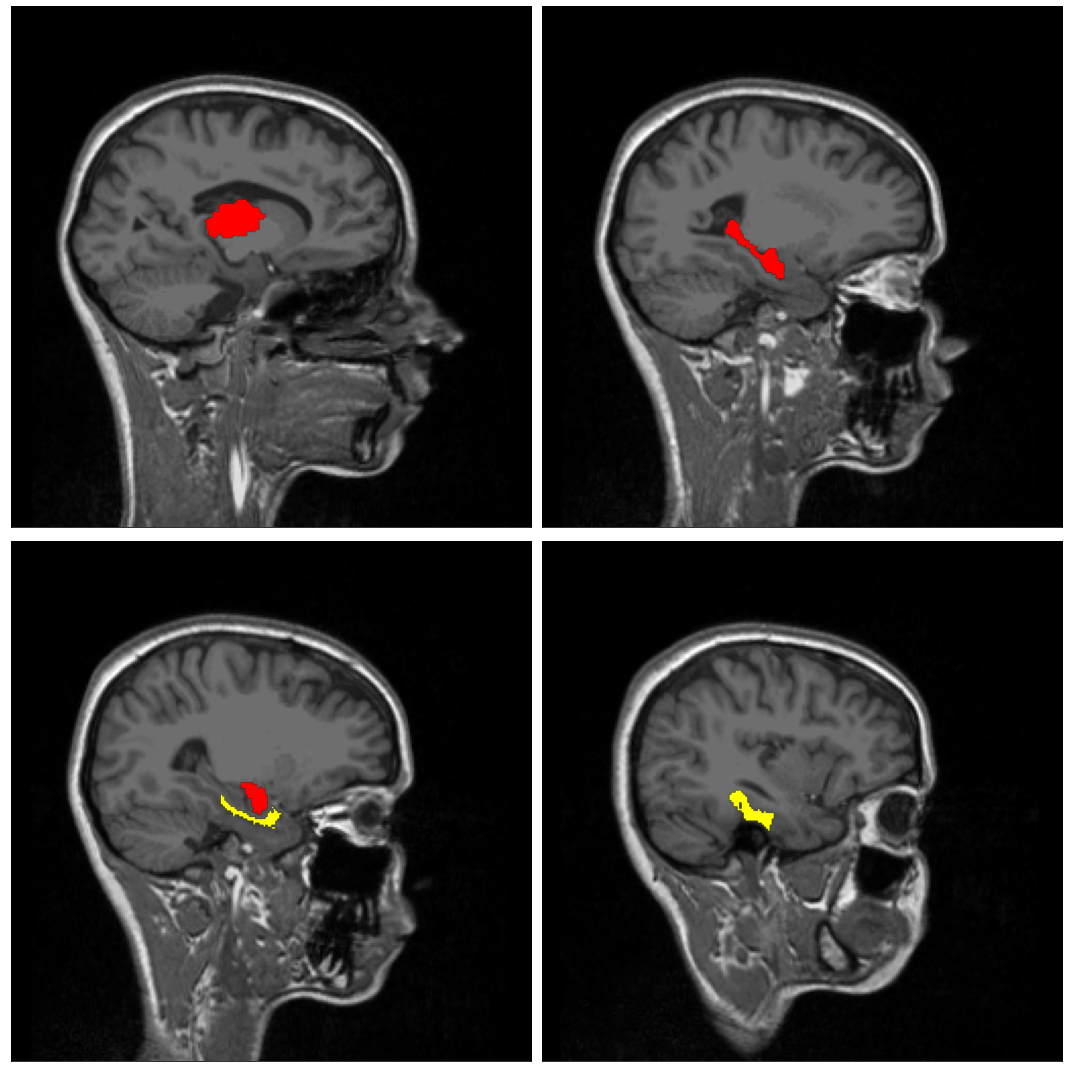

In [18]:
slc_idx = [115, 108, 105, 96]
slc_roi = {slc_idx[0]:(82,), slc_idx[1]:(86,), slc_idx[2]:(87, 111,), slc_idx[3]:(138,)}
ez_clr = (255,0,0,1)
pz_clr = (255,255,0,1)
hz_clr = (0,255,0,1)
plt.figure(figsize=(15,15))
for i, slc_idx_ in enumerate(slc_idx):
    t1_slc = t1_dat[slc_idx_, :, :]
    lbl_slc = lbl_dat_t1fov[slc_idx_, :, :]
    ol = np.zeros(lbl_slc.shape + (4,))
    for roi in slc_roi[slc_idx_]:
        if roi in ez:
            ol[lbl_slc == roi+1] = ez_clr
        if roi in pz:
            ol[lbl_slc == roi+1] = pz_clr
    plt.subplot(2,2,i+1)
    plt.imshow(t1_slc, cmap='gray');
    plt.imshow(ol)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.savefig('../results/meysam/slice_plots_predicted.svg')